In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('glass.csv')

In [3]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
# Lets try pairplot and correlation heatmap first


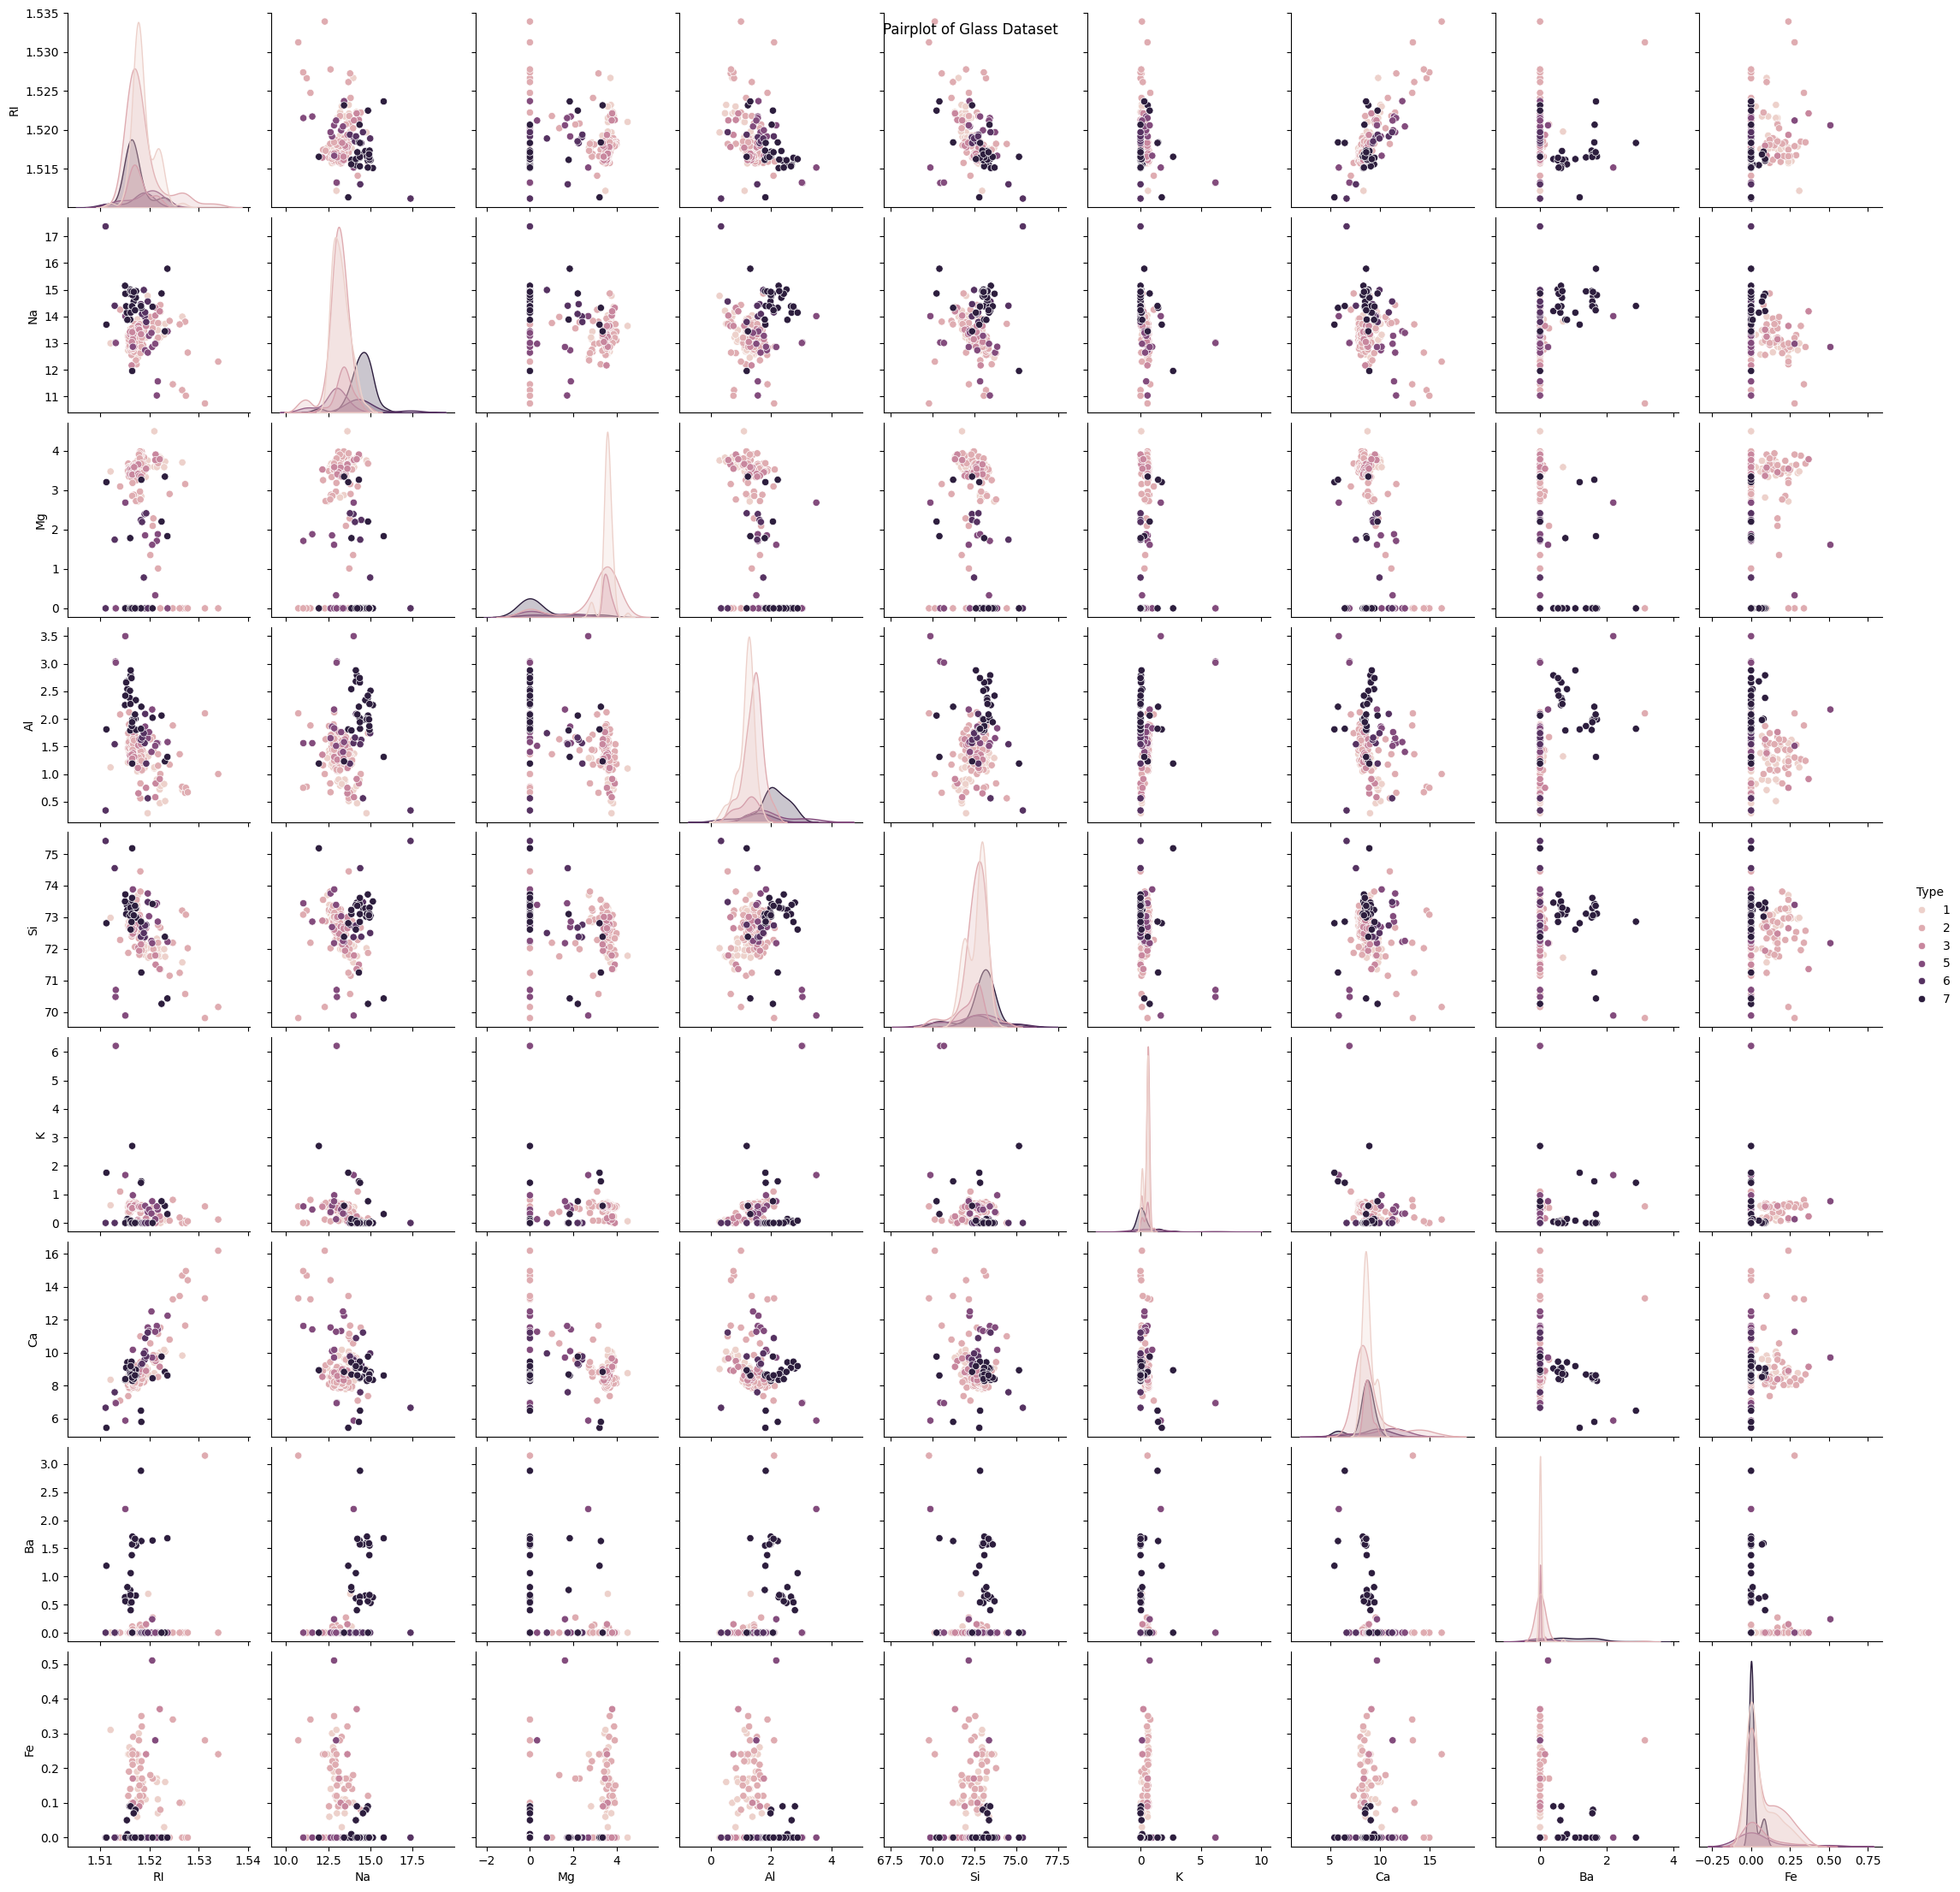

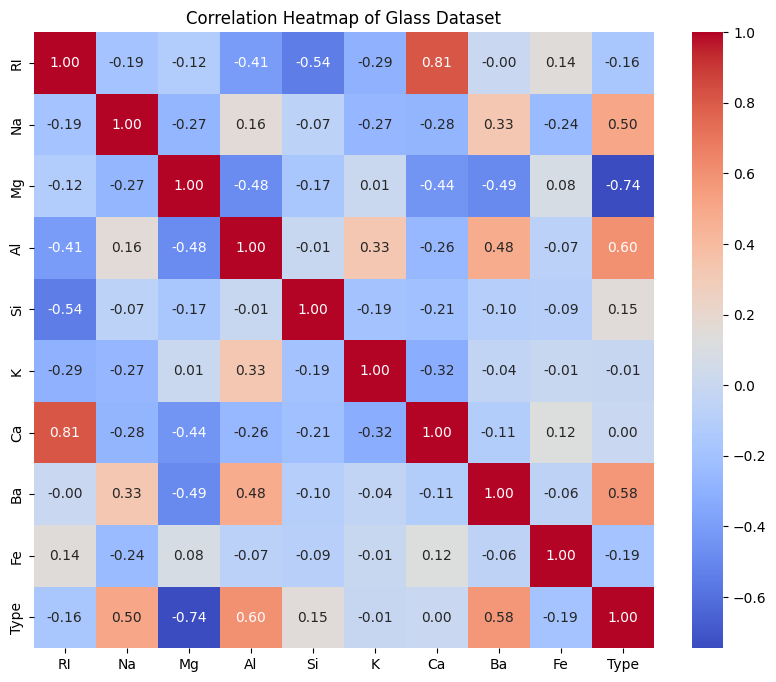

In [9]:
df = pd.DataFrame(data)

# Pairplot
sns.pairplot(df, hue='Type', diag_kind='kde')
plt.suptitle('Pairplot of Glass Dataset')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Glass Dataset')
plt.show()


## Observations

    Calcium (Ca) and Refractive Index (RI):
        These two variables exhibit a strong positive correlation with a coefficient of 0.81.
        Higher calcium content tends to be associated with higher refractive indices in glass compositions.

    Magnesium (Mg) and Glass Type:
        There is a strong negative correlation between magnesium content and glass type, with a coefficient of -0.74.
        As magnesium content increases, the glass type tends to shift towards a different category.

    Other Correlations:
        Sodium (Na) shows a moderate positive correlation with Refractive Index (RI).
        Aluminum (Al) has a weak positive correlation with Refractive Index (RI).
        Silicon (Si) and Potassium (K) exhibit weak correlations with other variables.



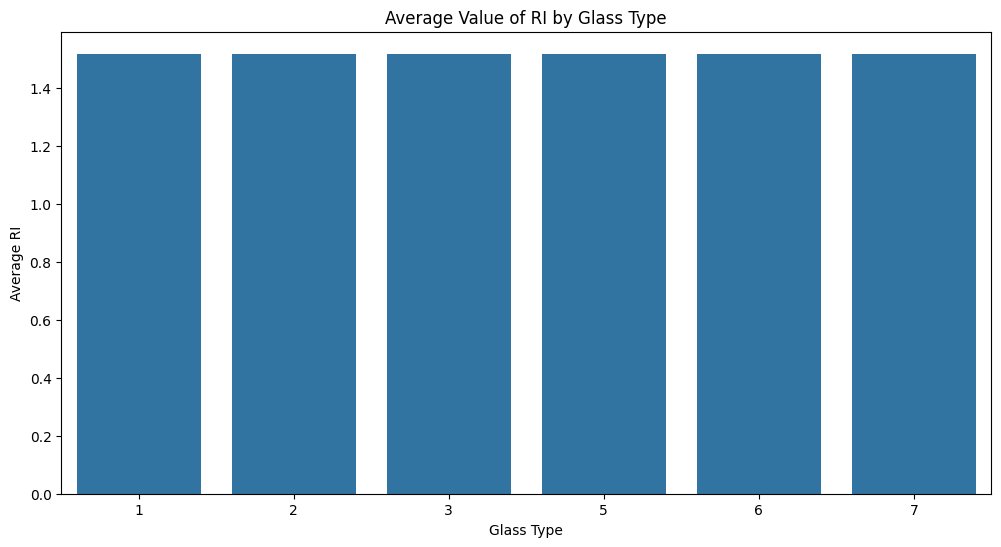

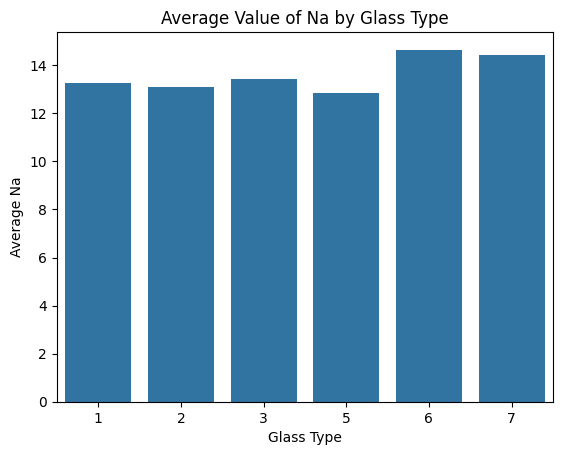

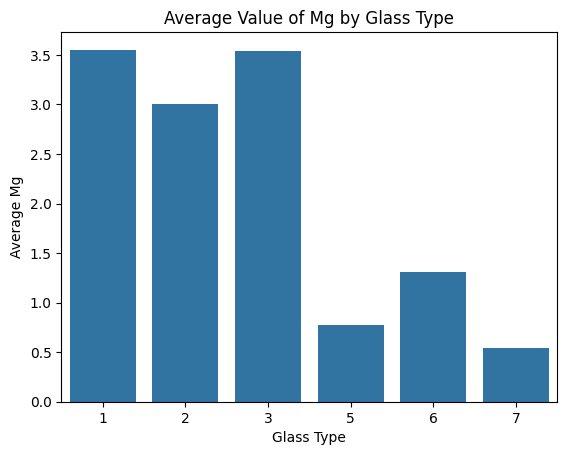

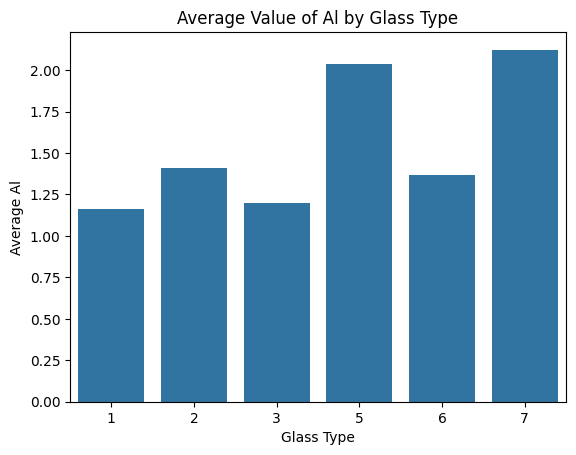

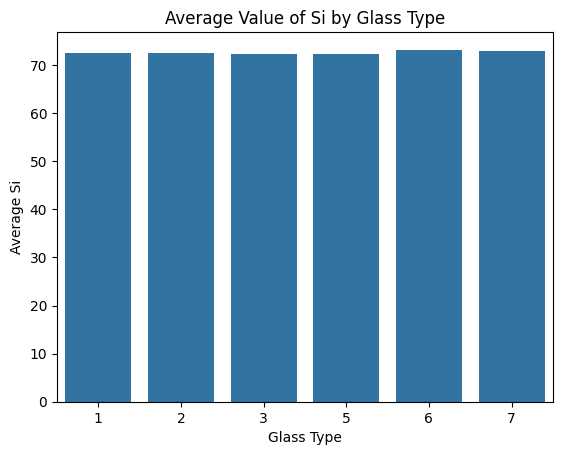

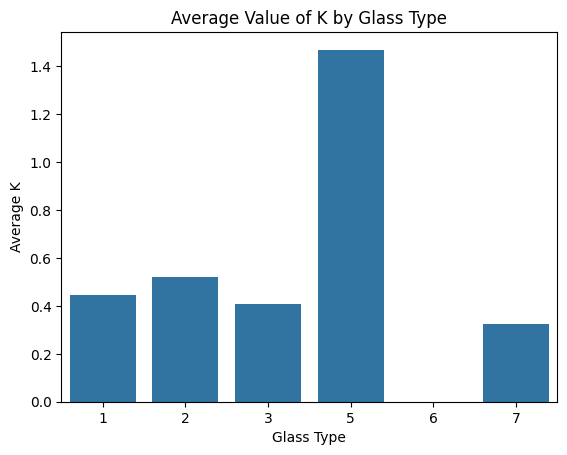

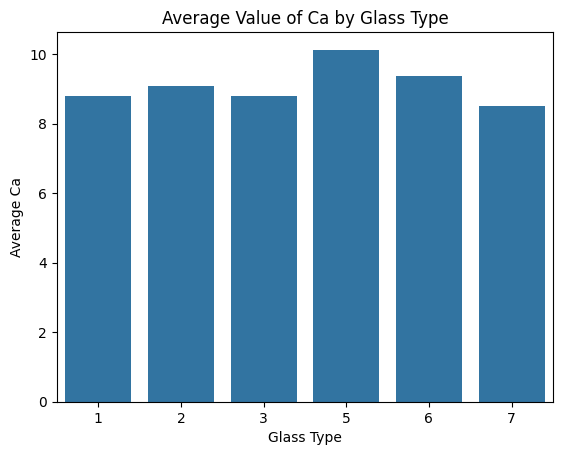

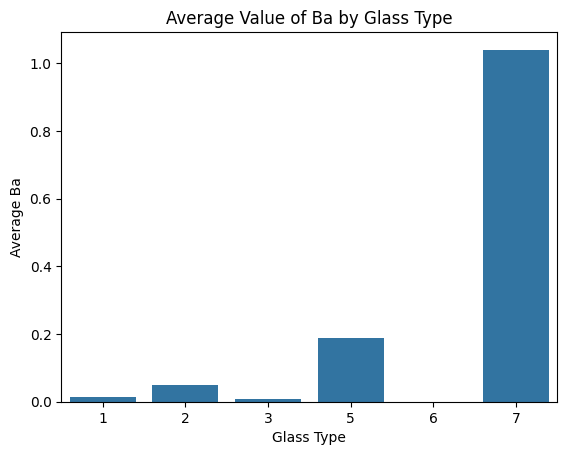

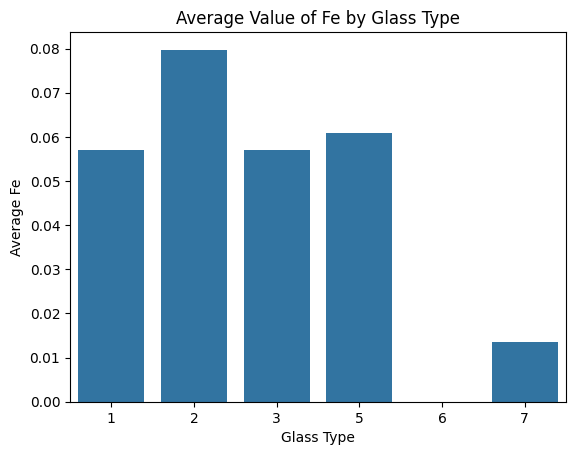

In [14]:
#Bar plot
plt.figure(figsize=(12, 6))
for col in df.columns[:-1]:  # Exclude 'Type' column
    sns.barplot(x='Type', y=col, data=df, errorbar=None)
    plt.title(f'Average Value of {col} by Glass Type')
    plt.xlabel('Glass Type')
    plt.ylabel(f'Average {col}')
    plt.show()

# Observation-> The following plot shows the average value of each type of material in each glass type

In [5]:
data.isnull().sum()#No null values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
data.Type.value_counts()#Most of them are in 1 or 2 types, might need to do stratify sampling on type

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

## Doing KNN on the data using default k as 3 ie 3 neighbors will be compared and the new datapoint will be given label according to the 3 nearest neighbors

In [7]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X = data.drop('Type',axis=1)
y = data.Type

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose the value of k 
k_value = 3 #keeping k as 3 as default to check for overfitting if value is low

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.7906976744186046
Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.79      0.81        14
           2       0.71      1.00      0.83        15
           3       1.00      0.33      0.50         3
           5       1.00      0.33      0.50         3
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.79        43
   macro avg       0.90      0.63      0.69        43
weighted avg       0.83      0.79      0.77        43



## Now lets try GridCV to get best parameter for k

In [10]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Assume you have already defined X, y, and split the data into training and testing sets

# Choose a range of values for k
k_values = list(range(3, 21))  # Experiment with different values We are not going to use values less than 3 because model will be prone to overfitting 

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid
param_grid = {'n_neighbors': k_values}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)  # 5-fold cross-validation

# Fit the model to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Get the best model with the optimal value of k
best_knn_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Best Parameters: {'n_neighbors': 4}
Best Accuracy: 0.6615126050420168
Accuracy: 0.7209302325581395
Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.79      0.73        14
           2       0.71      0.80      0.75        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.50      0.50      0.50         2
           7       0.83      0.83      0.83         6

    accuracy                           0.72        43
   macro avg       0.62      0.60      0.60        43
weighted avg       0.68      0.72      0.70        43



/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
y_pred,y_test.values

(array([7, 5, 2, 5, 1, 2, 2, 2, 1, 1, 1, 1, 7, 6, 1, 7, 7, 1, 1, 2, 2, 1,
        7, 2, 1, 1, 2, 6, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 7]),
 array([7, 5, 2, 5, 1, 1, 2, 2, 1, 1, 3, 1, 7, 6, 2, 7, 7, 1, 1, 5, 1, 1,
        7, 2, 2, 3, 2, 2, 2, 2, 7, 3, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 6]))